In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ai_job_trends.csv')
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


1. EDA

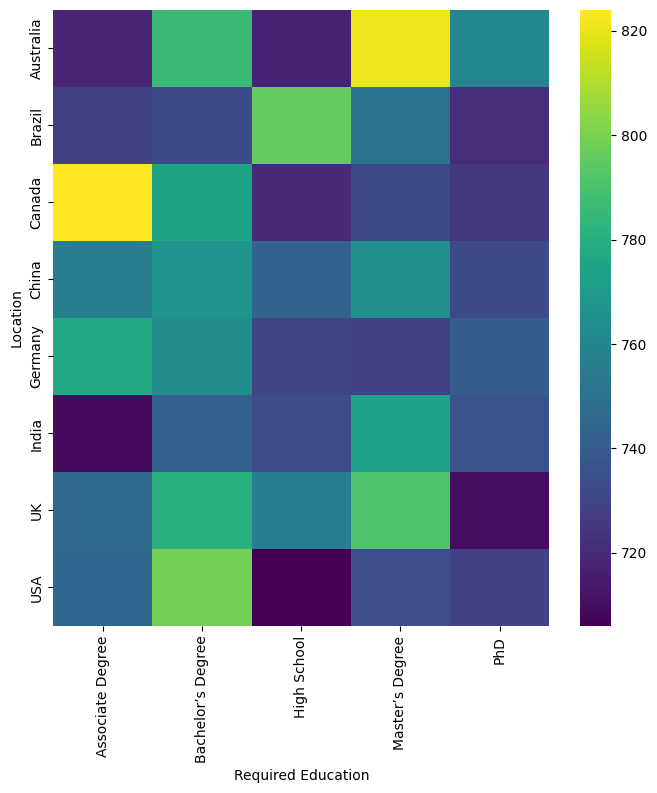

In [ ]:
# @title Required Education vs Location

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in df.groupby('Required Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Required Education')
_ = plt.ylabel('Location')

grafik heatmap "Required Education vs Location"

1. Terlihat ada konsentrasi pekerjaan yang cukup tinggi (warna lebih terang) di beberapa perpotongan antara tingkat pendidikan dan lokasi.
2. Berdasarkan plot, tampak bahwa tingkat pendidikan Bachelor's Degree memiliki distribusi yang relatif merata di berbagai lokasi seperti USA, UK, India, Brazil, dan Canada, dengan potensi konsentrasi yang lebih tinggi di beberapa lokasi tersebut.
3. Tingkat pendidikan seperti Master's Degree dan PhD mungkin juga terkonsentrasi di lokasi-lokir tertentu, meskipun mungkin tidak sebanyak pekerjaan yang membutuhkan Bachelor's Degree secara keseluruhan.
4. Tingkat pendidikan Associate Degree dan High School juga tersebar di beberapa lokasi, tetapi mungkin dengan pola konsentrasi yang berbeda dibandingkan dengan gelar yang lebih tinggi.

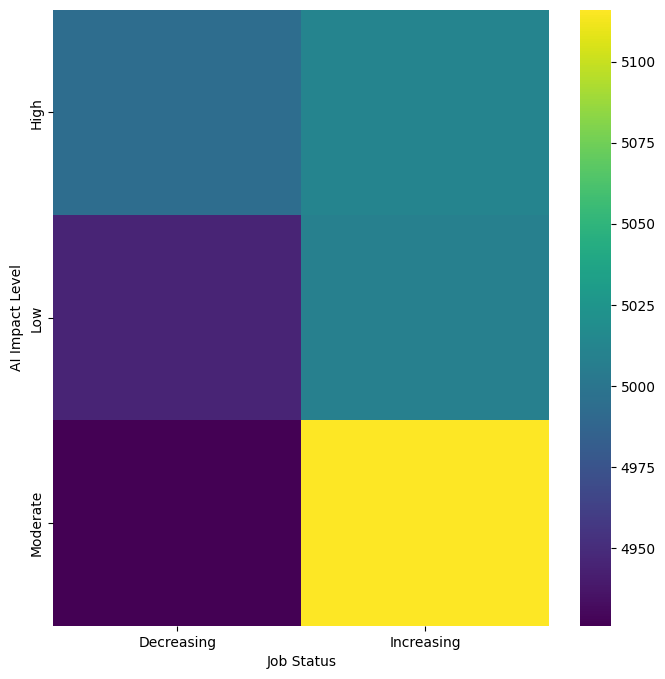

In [ ]:
# @title Job Status vs AI Impact Level

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AI Impact Level'].value_counts()
    for x_label, grp in df.groupby('Job Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Job Status')
_ = plt.ylabel('AI Impact Level')

interpretasikan heatmap "Job Status vs AI Impact Level"

1. Terlihat ada sebaran yang cukup merata antara pekerjaan dengan status 'Decreasing' dan 'Increasing' di setiap tingkat dampak AI. Warna pada baris 'Decreasing' dan 'Increasing' untuk setiap kolom 'AI Impact Level' (High, Moderate, Low) tampak memiliki intensitas yang serupa.
2. Ini menunjukkan bahwa, berdasarkan dataset ini, status pekerjaan (apakah sedang meningkat atau menurun) tampaknya tidak secara kuat berkorelasi langsung dengan tingkat dampak AI pada pekerjaan tersebut.
3. Dengan kata lain, pekerjaan dengan dampak AI yang Tinggi, Moderate, maupun Low memiliki kemungkinan yang relatif mirip untuk memiliki status 'Increasing' maupun 'Decreasing'.

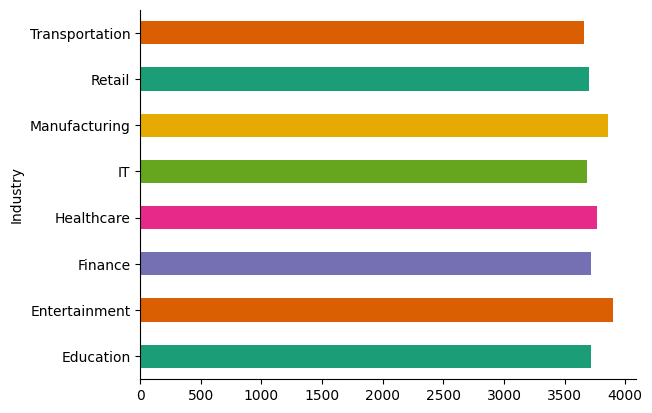

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Sumbu Y: Menunjukkan berbagai kategori industri dalam dataset.

Sumbu X: Menunjukkan jumlah pekerjaan atau frekuensi untuk setiap industri.

Dari bar plot ini, dapat dengan mudah melihat industri mana yang paling banyak diwakili dalam dataset, dan industri mana yang paling sedikit. Panjang setiap batang menunjukkan jumlah pekerjaan di industri tersebut.

Melihat grafik tersebut, dapat mengidentifikasi industri teratas dengan jumlah pekerjaan terbanyak dan industri terbawah. Ini memberikan gambaran tentang komposisi industri dari data pekerjaan AI ini.

2. DATA PREPROCECING

In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

Jumlah nilai yang hilang per kolom:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


interpretasikan:

1. Output dari sel ini menunjukkan bahwa tidak ada nilai yang hilang di kolom manapun dalam dataset Anda. Ini adalah hasil yang bagus, karena Anda tidak perlu khawatir tentang strategi imputasi atau penghapusan untuk menangani nilai-nilai yang kosong. Dataset Anda lengkap dalam hal ini.
2.

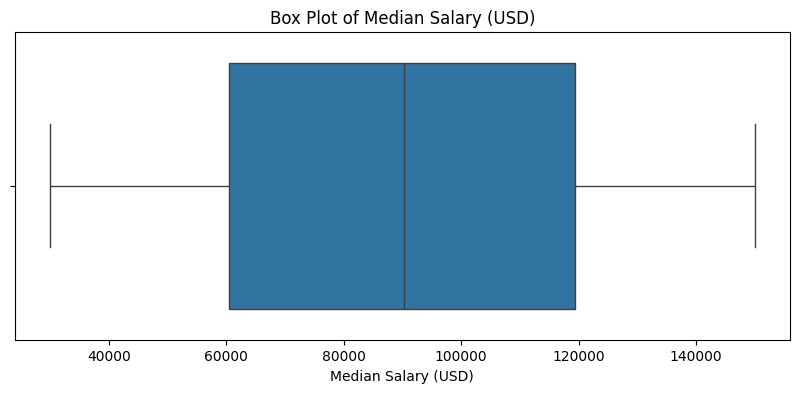

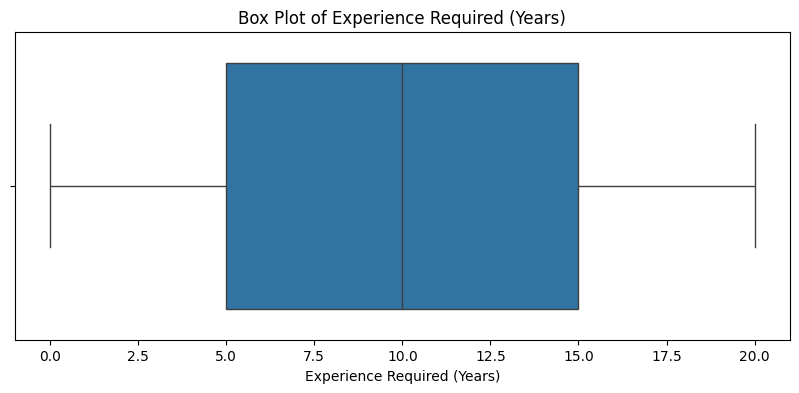

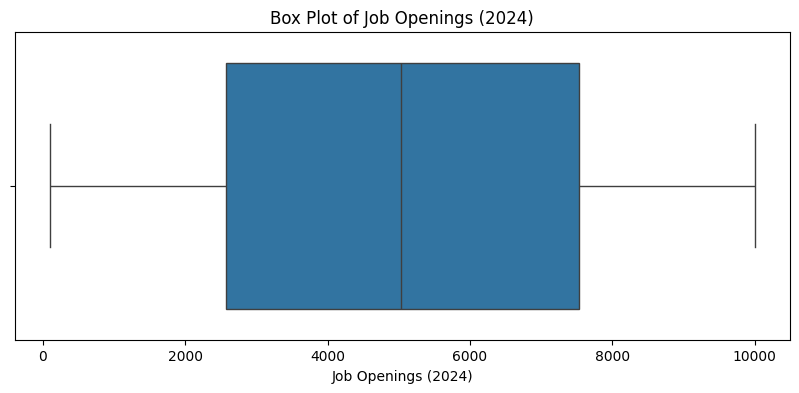

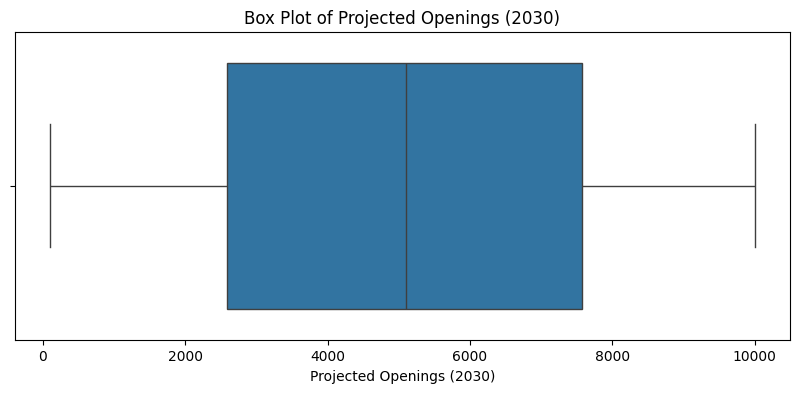

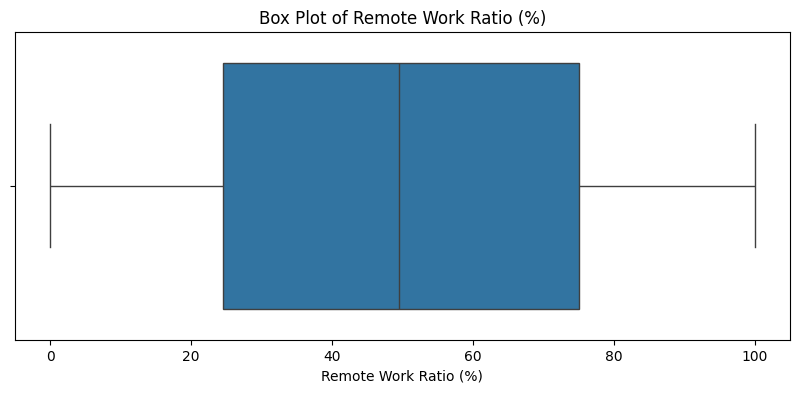

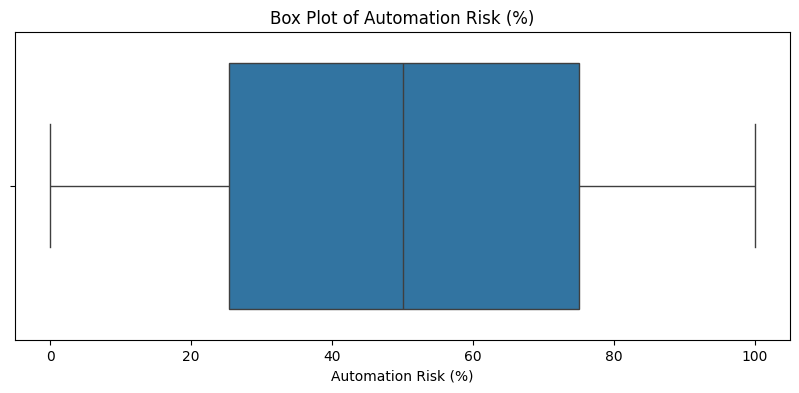

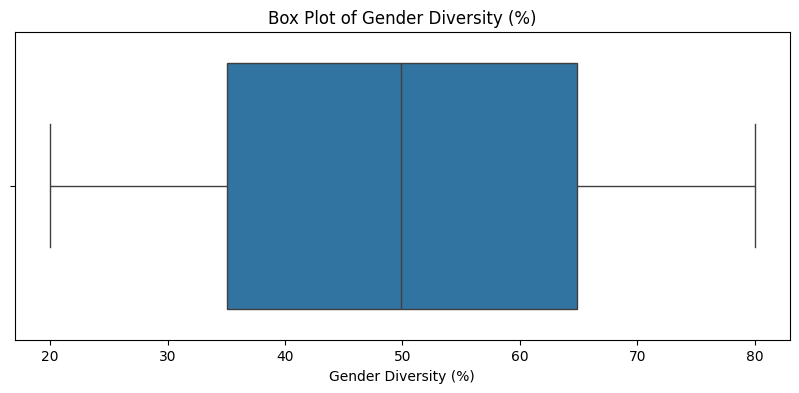

In [ ]:
# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

interpretasi:

1. Box plot yang dihasilkan menunjukkan distribusi untuk setiap kolom numerik. Titik-titik di luar "whiskers" pada box plot mengindikasikan potensi outlier dalam data Anda.
2. Terlihat ada outlier di beberapa kolom numerik, seperti 'Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', dan 'Gender Diversity (%)'.
3. Keberadaan outlier ini berarti ada beberapa entri data yang memiliki nilai ekstrem yang jauh dari sebagian besar data lainnya di kolom-kolom tersebut.

Dataset dalam kondisi yang cukup baik karena tidak ada nilai yang hilang. Namun, ada outlier di kolom-kolom numerik. Outlier ini mungkin memengaruhi hasil analisis statistik atau kinerja beberapa model pembelajaran mesin (meskipun model berbasis pohon seperti Random Forest cenderung lebih tangguh terhadap outlier dibandingkan model linier).

3. MODELLING (RANDOM TREE FOREST)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config

# Pisahkan fitur (X) dan target (y)
X = df.drop('Job Status', axis=1)
y = df['Job Status']

# Identifikasi fitur numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Biarkan kolom lain apa adanya
)

# Mengganti DecisionTreeClassifier dengan RandomForestClassifier
complete_pipeline_rf = Pipeline([("preprocess_pipe",preprocessor),
                               ("model",RandomForestClassifier(random_state=202310))])

# Menampilkan pipeline baru
set_config(display='diagram')
complete_pipeline_rf

Pipeline(steps=[('preprocess_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Median Salary (USD)', 'Experience Required (Years)',
       'Job Openings (2024)', 'Projected Openings (2030)',
       'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Job Title', 'Industry', 'AI Impact Level', 'Required Education',
       'Location'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=202310))])

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran set pelatihan:", X_train.shape, y_train.shape)
print("Ukuran set pengujian:", X_test.shape, y_test.shape)

Ukuran set pelatihan: (24000, 12) (24000,)
Ukuran set pengujian: (6000, 12) (6000,)


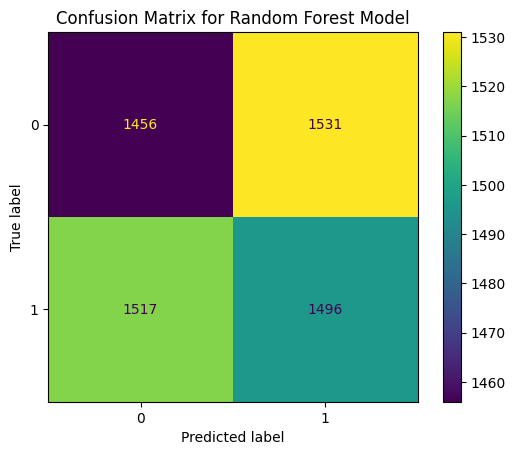

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

interpretasi:

1. True Negatives (Kiri Atas): 1456
Model dengan benar memprediksi 1456 pekerjaan berstatus 'Decreasing' yang sebenarnya memang 'Decreasing'.
2. False Positives (Kanan Atas): 1531
Model salah memprediksi 1531 pekerjaan berstatus 'Increasing', padahal sebenarnya pekerjaan tersebut 'Decreasing'. Ini adalah kesalahan Tipe I.
3. False Negatives (Kiri Bawah): 1517
Model salah memprediksi 1517 pekerjaan berstatus 'Decreasing', padahal sebenarnya pekerjaan tersebut 'Increasing'. Ini adalah kesalahan Tipe II.
4. True Positives (Kanan Bawah): 1496
Model dengan benar memprediksi 1496 pekerjaan berstatus 'Increasing' yang sebenarnya memang 'Increasing'.

kesimpulan:

1. Jumlah prediksi yang benar (True Negatives + True Positives = 1456 + 1496 = 2952) kira-kira sama dengan jumlah prediksi yang salah (False Positives + False Negatives = 1531 + 1517 = 3048). Ini sesuai dengan akurasi model yang sekitar 49.20%.
2. Model kesulitan membedakan antara pekerjaan dengan status 'Decreasing' dan 'Increasing'. Jumlah kesalahan False Positives (1531) dan False Negatives (1517) sangat mirip dan relatif tinggi dibandingkan dengan prediksi yang benar. Ini menunjukkan bahwa model seringkali salah mengklasifikasikan satu kelas sebagai kelas lainnya dengan frekuensi yang hampir sama.

In [ ]:
# Latih model Random Forest menggunakan data pelatihan
complete_pipeline_rf.fit(X_train, y_train)

print("Model Random Forest telah dilatih.")

Model Random Forest telah dilatih.


In [ ]:
# Membuat prediksi pada set pengujian
y_pred = complete_pipeline_rf.predict(X_test)

print("Prediksi pada set pengujian telah dibuat.")

Prediksi pada set pengujian telah dibuat.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Gunakan 'weighted' karena ini klasifikasi multi-kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Tampilkan classification report untuk detail lebih lanjut per kelas
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.4920
Presisi (weighted): 0.4920
Recall (weighted): 0.4920
F1-score (weighted): 0.4920

Classification Report:
              precision    recall  f1-score   support

  Decreasing       0.49      0.49      0.49      2987
  Increasing       0.49      0.50      0.50      3013

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000


Confusion Matrix:
[[1456 1531]
 [1517 1496]]


interpretasi:

Precision: Mengukur akurasi prediksi positif untuk kelas tersebut. Artinya, dari semua sampel yang diprediksi sebagai kelas tersebut, berapa proporsi yang sebenarnya benar-benar termasuk dalam kelas tersebut.
1. Decreasing (0.49): Dari semua pekerjaan yang diprediksi sebagai 'Decreasing', hanya sekitar 49% yang sebenarnya berstatus 'Decreasing'.
2. Increasing (0.49): Dari semua pekerjaan yang diprediksi sebagai 'Increasing', hanya sekitar 49% yang sebenarnya berstatus 'Increasing'.

Recall: Mengukur kemampuan model untuk menemukan semua sampel positif dari kelas tersebut. Artinya, dari semua sampel yang sebenarnya termasuk dalam kelas tersebut, berapa proporsi yang berhasil diprediksi dengan benar oleh model.
1. Decreasing (0.49): Dari semua pekerjaan yang sebenarnya berstatus 'Decreasing', model berhasil mengidentifikasi sekitar 49%.
2. Increasing (0.50): Dari semua pekerjaan yang sebenarnya berstatus 'Increasing', model berhasil mengidentifikasi sekitar 50%.

F1-score: Merupakan rata-rata harmonis dari Precision dan Recall. Ini adalah metrik tunggal yang menyeimbangkan kedua metrik tersebut. Nilai F1-score yang tinggi menunjukkan kinerja yang baik dalam hal Precision dan Recall.
1. Decreasing (0.49): F1-score untuk kelas 'Decreasing' adalah 0.49.
2. Increasing (0.50): F1-score untuk kelas 'Increasing' adalah 0.50.

Support: Jumlah sampel sebenarnya yang termasuk dalam kelas tersebut di set pengujian.
1. Decreasing (2987): Ada 2987 pekerjaan yang sebenarnya berstatus 'Decreasing' di set pengujian.
2. Increasing (3013): Ada 3013 pekerjaan yang sebenarnya berstatus 'Increasing' di set pengujian. Dataset cukup seimbang.

Metrik Rata-rata:
1. Accuracy (0.49): Akurasi keseluruhan model, yaitu proporsi total prediksi yang benar.
2. Macro Avg (0.49 untuk semua metrik): Rata-rata metrik (Precision, Recall, F1-score) dihitung secara terpisah untuk setiap kelas, lalu diambil rata-ratanya tanpa mempertimbangkan jumlah sampel di setiap kelas.
3. Weighted Avg (0.49 untuk semua metrik): Rata-rata metrik dihitung dengan mempertimbangkan jumlah sampel (support) di setiap kelas. Karena dataset cukup seimbang (support 'Decreasing' dan 'Increasing' hampir sama), macro dan weighted average hampir identik.

In [12]:
 # Separate features (X) and target (y)
X = df.drop('Job Status', axis=1)
y = df['Job Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran set pelatihan:", X_train.shape, y_train.shape)
print("Ukuran set pengujian:", X_test.shape, y_test.shape)

Ukuran set pelatihan: (24000, 12) (24000,)
Ukuran set pengujian: (6000, 12) (6000,)


In [13]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns as they are
)

In [14]:
# Create the LightGBM pipeline
complete_pipeline_lgbm = Pipeline([("preprocess_pipe",preprocessor),
                                 ("model",LGBMClassifier(random_state=202310))])

# Display the pipeline
set_config(display='diagram')
complete_pipeline_lgbm

Pipeline(steps=[('preprocess_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Median Salary (USD)', 'Experience Required (Years)',
       'Job Openings (2024)', 'Projected Openings (2030)',
       'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Job Title', 'Industry', 'AI Impact Level', 'Required Education',
       'Location'],
      dtype='object'))])),
                ('model', LGBMClassifier(random_state=202310))])

In [15]:
# Train the LightGBM model using the training data
complete_pipeline_lgbm.fit(X_train, y_train)

print("Model LightGBM telah dilatih.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 12123, number of negative: 11877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 670
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505125 -> initscore=0.020501
[LightGBM] [Info] Start training from score 0.020501
Model LightGBM telah dilatih.


In [16]:
# Make predictions on the test set
y_pred_lgbm = complete_pipeline_lgbm.predict(X_test)

print("Prediksi pada set pengujian telah dibuat.")

Prediksi pada set pengujian telah dibuat.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [17]:
# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

print(f"LightGBM Akurasi: {accuracy_lgbm:.4f}")
print(f"LightGBM Presisi (weighted): {precision_lgbm:.4f}")
print(f"LightGBM Recall (weighted): {recall_lgbm:.4f}")
print(f"LightGBM F1-score (weighted): {f1_lgbm:.4f}")

# Display classification report
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Display Confusion Matrix
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

LightGBM Akurasi: 0.5068
LightGBM Presisi (weighted): 0.5067
LightGBM Recall (weighted): 0.5068
LightGBM F1-score (weighted): 0.5057

LightGBM Classification Report:
              precision    recall  f1-score   support

  Decreasing       0.51      0.46      0.48      2987
  Increasing       0.51      0.55      0.53      3013

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000


LightGBM Confusion Matrix:
[[1373 1614]
 [1345 1668]]


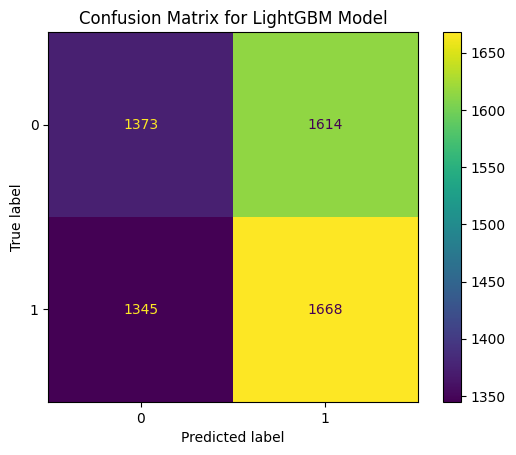

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Display the confusion matrix
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm)
disp_lgbm.plot()
plt.title("Confusion Matrix for LightGBM Model")
plt.show()

In [19]:
# Mengubah kolom 'Job Status' menjadi biner (Increasing=1, Decreasing=0)
df['Job Status_Binary'] = df['Job Status'].map({'Increasing': 1, 'Decreasing': 0})

# Menampilkan beberapa baris pertama untuk verifikasi
print(df[['Job Status', 'Job Status_Binary']].head())

# Menampilkan value counts untuk verifikasi distribusi
print("\nDistribusi nilai biner:")
print(df['Job Status_Binary'].value_counts())

   Job Status  Job Status_Binary
0  Increasing                  1
1  Increasing                  1
2  Increasing                  1
3  Increasing                  1
4  Increasing                  1

Distribusi nilai biner:
Job Status_Binary
1    15136
0    14864
Name: count, dtype: int64


In [20]:
# Menampilkan beberapa baris pertama dari DataFrame termasuk kolom biner yang baru
display(df.head())

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%),Job Status_Binary
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63,1
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39,1
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13,1
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76,1
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config

# Pisahkan fitur (X) dan target (y)
X = df.drop('Job Status_Binary', axis=1)
y = df['Job Status_Binary']

# Identifikasi fitur numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Biarkan kolom lain apa adanya
)

# Mengganti DecisionTreeClassifier dengan RandomForestClassifier
complete_pipeline_rf = Pipeline([("preprocess_pipe",preprocessor),
                               ("model",RandomForestClassifier(random_state=202310))])

# Menampilkan pipeline baru
set_config(display='diagram')
complete_pipeline_rf

Pipeline(steps=[('preprocess_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Median Salary (USD)', 'Experience Required (Years)',
       'Job Openings (2024)', 'Projected Openings (2030)',
       'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Required Education', 'Location'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=202310))])

In [25]:
# Pisahkan fitur (X) dan target (y) menggunakan kolom biner
X = df.drop(['Job Status', 'Job Status_Binary'], axis=1) # Hapus kolom asli 'Job Status' dari fitur
y = df['Job Status_Binary'] # Gunakan kolom biner sebagai target

# Bagi data yang diperbarui menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran set pelatihan (dengan target biner):", X_train.shape, y_train.shape)
print("Ukuran set pengujian (dengan target biner):", X_test.shape, y_test.shape)

Ukuran set pelatihan (dengan target biner): (24000, 12) (24000,)
Ukuran set pengujian (dengan target biner): (6000, 12) (6000,)


In [26]:
# Latih pipeline LightGBM menggunakan data pelatihan yang diperbarui (dengan target biner)
complete_pipeline_lgbm.fit(X_train, y_train)

print("Model LightGBM telah dilatih dengan target biner.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 12123, number of negative: 11877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 670
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505125 -> initscore=0.020501
[LightGBM] [Info] Start training from score 0.020501
Model LightGBM telah dilatih dengan target biner.


In [27]:
# Membuat prediksi pada set pengujian
y_pred_lgbm_binary = complete_pipeline_lgbm.predict(X_test)

print("Prediksi pada set pengujian telah dibuat dengan target biner.")

Prediksi pada set pengujian telah dibuat dengan target biner.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [28]:
# Evaluasi model LightGBM dengan target biner
accuracy_lgbm_binary = accuracy_score(y_test, y_pred_lgbm_binary)
precision_lgbm_binary = precision_score(y_test, y_pred_lgbm_binary, average='binary') # Gunakan 'binary' untuk klasifikasi biner
recall_lgbm_binary = recall_score(y_test, y_pred_lgbm_binary, average='binary')
f1_lgbm_binary = f1_score(y_test, y_pred_lgbm_binary, average='binary')

print(f"LightGBM Akurasi (target biner): {accuracy_lgbm_binary:.4f}")
print(f"LightGBM Presisi (target biner): {precision_lgbm_binary:.4f}")
print(f"LightGBM Recall (target biner): {recall_lgbm_binary:.4f}")
print(f"LightGBM F1-score (target biner): {f1_lgbm_binary:.4f}")

# Tampilkan classification report
print("\nLightGBM Classification Report (target biner):")
print(classification_report(y_test, y_pred_lgbm_binary))

# Tampilkan Confusion Matrix
print("\nLightGBM Confusion Matrix (target biner):")
print(confusion_matrix(y_test, y_pred_lgbm_binary))

LightGBM Akurasi (target biner): 0.5068
LightGBM Presisi (target biner): 0.5082
LightGBM Recall (target biner): 0.5536
LightGBM F1-score (target biner): 0.5299

LightGBM Classification Report (target biner):
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      2987
           1       0.51      0.55      0.53      3013

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000


LightGBM Confusion Matrix (target biner):
[[1373 1614]
 [1345 1668]]


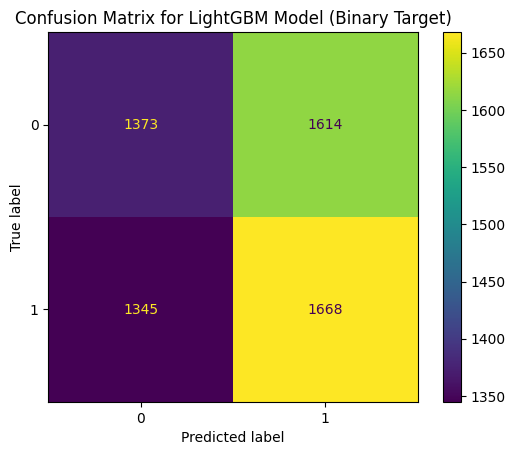

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the binary target
cm_lgbm_binary = confusion_matrix(y_test, y_pred_lgbm_binary)

# Display the confusion matrix
disp_lgbm_binary = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_binary)
disp_lgbm_binary.plot()
plt.title("Confusion Matrix for LightGBM Model (Binary Target)")
plt.show()